<a href="https://colab.research.google.com/github/yoonsongg/CS2/blob/main/pytorch_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch

In [5]:
def describe(x):
    print(f"type : {x.type()}")
    print(f"size : {x.shape}")
    print(f"value : {x}")

In [6]:
describe(torch.Tensor(2,3))

type : torch.FloatTensor
size : torch.Size([2, 3])
value : tensor([[-1.2416e+21,  3.0852e-41,  3.7835e-44],
        [ 0.0000e+00,         nan,  0.0000e+00]])


In [7]:
describe(torch.rand(2, 3))

type : torch.FloatTensor
size : torch.Size([2, 3])
value : tensor([[0.9988, 0.2538, 0.3809],
        [0.6369, 0.4528, 0.4685]])


In [8]:
describe(torch.randn(2,3))

type : torch.FloatTensor
size : torch.Size([2, 3])
value : tensor([[ 2.8205, -0.4101,  2.0375],
        [-0.3580, -2.0816,  1.7086]])


In [9]:
x = torch.ones(2,3)
describe(x)

type : torch.FloatTensor
size : torch.Size([2, 3])
value : tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [10]:
x.fill_(5)

tensor([[5., 5., 5.],
        [5., 5., 5.]])

In [11]:
describe(x)

type : torch.FloatTensor
size : torch.Size([2, 3])
value : tensor([[5., 5., 5.],
        [5., 5., 5.]])


In [12]:
x = torch.Tensor([[1,2,3,], [4,5,6]])
describe(x)

type : torch.FloatTensor
size : torch.Size([2, 3])
value : tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [13]:
import torch
import numpy as np
npy = np.random.rand(2,3)

In [14]:
describe(torch.from_numpy(npy))

type : torch.DoubleTensor
size : torch.Size([2, 3])
value : tensor([[0.7170, 0.8862, 0.7319],
        [0.4821, 0.6377, 0.2422]], dtype=torch.float64)


In [15]:
import torch
x = torch.arange(6).view(2,3)
describe(x)

type : torch.LongTensor
size : torch.Size([2, 3])
value : tensor([[0, 1, 2],
        [3, 4, 5]])


In [16]:
describe(x[:1, :2])

type : torch.LongTensor
size : torch.Size([1, 2])
value : tensor([[0, 1]])


In [17]:
describe(x)

type : torch.LongTensor
size : torch.Size([2, 3])
value : tensor([[0, 1, 2],
        [3, 4, 5]])


In [18]:
describe(x[0,1])

type : torch.LongTensor
size : torch.Size([])
value : 1


In [22]:
indices = torch.LongTensor([0, 1])#열 인덱스 준 것
describe(torch.index_select(x, dim = 1, index= indices)) #열 인덱스대로 추출(index_select)

type : torch.LongTensor
size : torch.Size([2, 2])
value : tensor([[0, 1],
        [3, 4]])


In [24]:
indices = torch.LongTensor([0, 0])
describe(torch.index_select(x, dim = 0, index= indices)) #행 인덱스대로 추출(index_select)
#0번째 행 두번 추출

type : torch.LongTensor
size : torch.Size([2, 3])
value : tensor([[0, 1, 2],
        [0, 1, 2]])


In [29]:
row_indices = torch.arange(2).long() #[0,1]
col_indices = torch.LongTensor([0,1])
describe(x[row_indices, col_indices]) #[0,0] , [1,1]


type : torch.LongTensor
size : torch.Size([2])
value : tensor([0, 4])


In [32]:
describe(torch.cat([x,x], dim = 1))

type : torch.LongTensor
size : torch.Size([2, 6])
value : tensor([[0, 1, 2, 0, 1, 2],
        [3, 4, 5, 3, 4, 5]])


In [45]:
import torch
x1 = torch.arange(6).view(2,3).float()
describe(x1)

type : torch.FloatTensor
size : torch.Size([2, 3])
value : tensor([[0., 1., 2.],
        [3., 4., 5.]])


In [46]:
x2 = torch.ones(3,2)
x2[:, 1] +=1
describe(x2)

type : torch.FloatTensor
size : torch.Size([3, 2])
value : tensor([[1., 2.],
        [1., 2.],
        [1., 2.]])


In [47]:
describe(torch.mm(x1, x2))

type : torch.FloatTensor
size : torch.Size([2, 2])
value : tensor([[ 3.,  6.],
        [12., 24.]])


In [60]:
import torch
x = torch.ones(2,2, requires_grad = True)
describe(x)
print(x.grad is None)
print(x.grad)

type : torch.FloatTensor
size : torch.Size([2, 2])
value : tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
True
None


In [64]:
y = (x + 2) * (x + 5) + 3
describe(y)
#y.backward() -> 안됨. scalar여야 backward 된다고 함 
print(x.grad is None)
print(x.grad)

type : torch.FloatTensor
size : torch.Size([2, 2])
value : tensor([[21., 21.],
        [21., 21.]], grad_fn=<AddBackward0>)
False
tensor([[2.2500, 2.2500],
        [2.2500, 2.2500]])


In [62]:
z = y.mean()
describe(z)
z.backward()
print(x.grad is None)
print(x.grad)

type : torch.FloatTensor
size : torch.Size([])
value : 21.0
False
tensor([[2.2500, 2.2500],
        [2.2500, 2.2500]])


In [66]:
import torch
#runtime -> GPU -> True
print(torch.cuda.is_available())


False


#chapter3 신경망의 기본구성요소


In [67]:
import torch
import torch.nn as nn

class Perceptron(nn.Module):
    def __init__(self, input_dim):
        super(Perceptron, self).__init__()
        self.fc1 = nn.Linear(input_dim, 1)

    def forward(self, x_in):
        return torch.sigmoid(self.fc1(x_in)).squeeze()
        

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  This is separate from the ipykernel package so we can avoid doing imports until


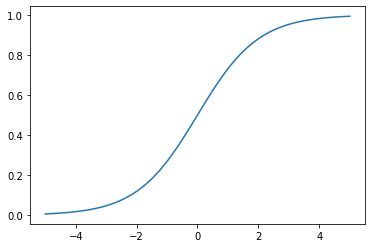

In [76]:
import matplotlib.pyplot as plt

x = torch.range(-5, 5, 0.1)
y = torch.sigmoid(x)
plt.plot(x.numpy(), y.numpy())
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  


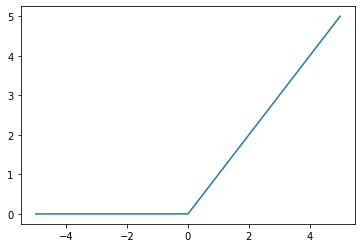

In [74]:
relu = torch.nn.ReLU()
x = torch.range(-5, 5, 0.1)
y = relu(x)

plt.plot(x.numpy(), y.numpy())
plt.show()

In [77]:
import torch
import torch.nn as nn

mse_loss = nn.MSELoss()
outputs = torch.randn(3,5, requires_grad = True)
targets = torch.randn(3,5)
loss = mse_loss(outputs, targets)
print(loss)

tensor(1.5532, grad_fn=<MseLossBackward0>)


In [80]:
#다중 클래스 분류
ce_loss = nn.CrossEntropyLoss()
outputs = torch.randn(3,5, requires_grad = True)
targets = torch.tensor([1,0,3], dtype = torch.int64)
loss = ce_loss(outputs, targets)
print(loss)
describe(outputs)

tensor(1.7952, grad_fn=<NllLossBackward0>)
type : torch.FloatTensor
size : torch.Size([3, 5])
value : tensor([[ 1.0284,  1.2132,  1.1875,  0.1412,  0.4281],
        [ 0.1284, -1.1033,  2.7044,  0.5416, -0.2426],
        [-1.0818,  1.6684, -0.2459,  1.1426,  0.6139]], requires_grad=True)


In [88]:
#이진 클래스 분류 binary cross entropy
bce_loss = nn.BCELoss()
sigmoid = nn.Sigmoid()
probabilities = sigmoid(torch.randn(4,1, requires_grad = True))
targets = torch.tensor([1,0,1,0], dtype = torch.float32).view(4,1)
loss = bce_loss(probabilities, targets)
print(probabilities)
print(loss)

tensor([[0.6032],
        [0.1092],
        [0.4239],
        [0.5591]], grad_fn=<SigmoidBackward0>)
tensor(0.5746, grad_fn=<BinaryCrossEntropyBackward0>)


In [90]:
import torch.nn as nn
import torch.optim as optim

input_dim = 2
lr = 0.001

perceptron = Perceptron(input_dim = input_dim)
bce_loss = nn.BCELoss()
optimizer = optim.Adam(params = perceptron.parameters(), lr = lr)

In [91]:
for epoch_i in range(n_epochs):
    for batch_i in range(n_batches):
        x_data, y_target = get_toy_data(batch_size)
        perceptron.zero_grad()
        y_pred = perceptron(x_data, apply_sigmoid = True)
        loss = bce_loss(y_pred, y_target)
        loss.backward()
        optimizer.step()

NameError: ignored

In [95]:
import collections

by_rating = collections.defaultdict(list)
for _, row in review_subset.iterrows():
    by_rating[row.rating].append(row.to_dict())

final_list = []
np.random.seed(args.seed)

for _, item_list in sorted(by_rating.items()):
    np.random.shuffle(item_list)
    n_total = len(item_list)
    n_train = int(args.train_proportion * n_total)
    n_val = int(args.val_proportion * n_total)
    n_test = int(args.test_proportion * n_total)

    for item in item_list[:n_train]:
        item['split'] = 'train'
    for item in item_list[n_train: n_train + n_val]:
        itme['split'] = 'val'
    for item in item_list[n_train+n_val : n_train + n_val + n_test]:
        item['split'] = 'test'
    
    final_list.extend(item_list)

final_reviews = pd.DataFrame(final_list)


NameError: ignored

In [96]:
#전처리
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"([.,!?])", r"\1", text)
    text = re.sub(r"[^a-zA-Z.,!?]+", r" ", text)
    return text
    
final_reviews.review = final_reviews.review.apply(preprocess_text)

NameError: ignored

In [ ]:
#torch에 있는 Dataset을 상속시켜서 ReviewDataset 만드는 중. (85~92p) - 다 안씀 
#Dataset 상속하면 __getitem__(), __len__() 메서드를 구현해야 됨. 그래야 dataloader가 이걸 사용함 
from torch.utils.data import Dataset

class ReviewDataset(Dataset):
    def __init__(self, review_df, vectorizer):
        self.review_df = review_df
        self._vectorizer = vectorizer
        self.train_df = self.review_df[self.review_df.split == 'train']
        self.train_size = len(self.train_df)

        self.val_df = self.review_df[self.review_df.split = 'val']
        self.validation_size = len(self.val_df)

        self.test_df = self.review_df[self.review_df.split = 'test']
        self.test_size = len(self.test_df)
        
        self._lookup_dict = {'train': (self.train_df, self.train_size),
                             'val' : (self.val_df, self.val_size),
                             'test' : (self.test_df, self.test_size)}
        self.set_split('train')



    @classmethod
    def load_dataset_and_make_vectorizer(cls, review_csv):
        review_df = pd.read_csv(review_csv)
        return cls(review_df, ReviewVectorizer.from_dataframe(review_df))

    def get_vectorizer(self):
        return self._vectorizer

    def set_split(self, split = 'train'):
        self._target_split = split
        self._target_df, self._target_size = self._lookup_dict[split]

    def __len__(self):
        return self._target_size

    def __getitem__(self, index):
        row = self._target_df.iloc[index]
        review_vector = self._vectorizer.vectorize(row.review)
        rating_index = self._vectorizer.rating_vocab.lookup_token(row.rating)
        return {'x_data' : review_vector, 'y_target' : rating_index}

    def get_num_batches(self, batch_size):
        return len(self) // batch_size




class Vocabulary(object):
    def __init__(self, token_to_idx = None, add_unk = True, unk_token = '<UNK>'):
        if token_to_idx is None:
            token_to_idx = {}




In [ ]:
#DataLoader

from torch.utils.data import DataLoader

def generate_batches(dataset, batch_size, shuffle = True, drop_last=True, device = "cpu"):

    dataloader = DataLoader(dataset = dataset, batch_size = batch_size, shuffle = shuffle, drop_last = drop_last)

    for data_dict in dataloader:
        out_data_dict = {}
        for name, tensor in data_dict.items():
            out_data_dict[name] = data_dict[name].to(device)
        yield out_data_dict


